# Python On Resonance (PyOR)
## Everybody can simulate NMR
## Version: Jeener


## Tutorial: Introduction to PyOR - NOE (Liouville Space - Exponential Propagation - Sparse Matrix)


Author: Vineeth Thalakottoor 

Email: vineethfrancis.physics@gmail.com

## Define the Path to PyOR source code, PythonOnResonance.py

In [1]:
pathSource = '/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/Source'

## Load Python packages

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
sys.path.append(pathSource)

import PythonOnResonance as PyOR

import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib notebook
import sympy as sp
from sympy import *

## Define Spin System (Two Spin Half)    

In [3]:
Spin_list = [1/2, 1/2]

## Define the unit of Hamiltonian

hbarEQ1 is True, then unit of Hamiltonian is in angular frequency

In [4]:
hbarEQ1 = True

## Generate the spin operators: Sx, Sy and Sz

Sx [ i ], Sy [ i ] and Sz [ i ]

'i' is the index of the spin

In [5]:
System = PyOR.Numerical_MR(Spin_list,hbarEQ1)

Sx,Sy,Sz = System.SpinOperator()

## Generate the spin operators: S+ and S-

Sp [ i ] and Sm [ i ]

'i' is the index of the spin

In [6]:
Sp,Sm = System.PMoperators(Sx,Sy)

## Generating Zeeman Hamiltonian (Lab and Rotating Frame)

In [7]:
# Gyromagnetic Ratio
Gamma = [System.gammaH1,System.gammaH1]

In [8]:
# B0 Field in Tesla, Static Magnetic field (B0) along Z
B0 = 9.4

In [9]:
# Rotating Frame Frequency
OmegaRF = [-System.gammaH1*B0,-System.gammaH1*B0]

In [10]:
# Offset Frequency in rotating frame (Hz)
Offset = [10.0,20.0]

In [11]:
# generate Larmor Frequencies
LarmorF = System.LarmorFrequency(Gamma,B0,Offset)

Larmor Frequency in MHz:  [-400.22802765 -400.22803765]


In [12]:
# Lab Frame Hamiltonian
Hz_lab = System.Zeeman(LarmorF,Sz)

In [13]:
# Rotating Frame Hamiltonian
Hz = System.Zeeman_RotFrame(LarmorF,Sz,OmegaRF)

## Zeeman Hamiltonian in Liouville Space (Sparse Matrix)

Sparse: True (Default: False)

In [14]:
System.Sparse_Matrix(True)
Hz_L = System.CommutationSuperoperator(Hz)
print(Hz_L)

  (1, 1)	(-125.66370630264282+0j)
  (2, 2)	(-62.83185291290283+0j)
  (3, 3)	(-188.49555921554565+0j)
  (4, 4)	(125.66370630264282+0j)
  (6, 6)	(62.83185338973999+0j)
  (7, 7)	(-62.83185291290283+0j)
  (8, 8)	(62.83185291290283+0j)
  (9, 9)	(-62.83185338973999+0j)
  (11, 11)	(-125.66370630264282+0j)
  (12, 12)	(188.49555921554565+0j)
  (13, 13)	(62.83185291290283+0j)
  (14, 14)	(125.66370630264282+0j)


## Initialize Density Matrix

In [15]:
Thermal_DensMatrix = True

if Thermal_DensMatrix:
    # Spin temperature of individual spins (initial) Kelvin
    Tin = [300.0,300.0] 
    
    # Spin temperature of individual spins (equlibrium) Kelvin
    Tfi = [300.0,300.0] 
    
    # High Temperature
    HT_approx = False
    
    # Initial Density Matrix
    rho_in = System.EqulibriumDensityMatrix_Advance(LarmorF,Sz,Tin,HT_approx)
    
    # Equlibrium Density Matrix
    rhoeq = System.EqulibriumDensityMatrix_Advance(LarmorF,Sz,Tfi,HT_approx)
else:
    rho_in = np.sum(Sz,axis=0)
    rhoeq = np.sum(Sz,axis=0)

Trace of density metrix =  1.0
Trace of density metrix =  1.0


## Converting initial and equlibrium density matrix into Liouvillian

In [16]:
rho_in_L = System.Vector_L(rho_in)
rhoeq_L = System.Vector_L(rhoeq)

## Pulse (Liouville Space)

In [17]:
flip_angle1 = 0.0
flip_angle2 = 180.0

rho_L = System.Rotate_L(rho_in_L,flip_angle1,Sy[0])
rho_L = System.Rotate_L(rho_L,flip_angle2,Sy[1])

## Relaxation in Liouville Space

In [18]:
R = None 
Rprocess = "Auto-correlated Dipolar Homonuclear" 
tau = [10.0e-12]
bIS = [30.0e3]
System.Relaxation_Parameters(LarmorF, OmegaRF, tau, bIS)
R_L = System.Relaxation_L(Rprocess,R,Sx,Sy,Sz,Sp,Sm)

In [19]:
print(R_L)

  (0, 0)	(0.15958496611406095+0j)
  (5, 0)	(-0.026631091045127824+0j)
  (6, 0)	(-0.026631091045127824+0j)
  (9, 0)	(-0.026631091045127824+0j)
  (10, 0)	(-0.026631091045127824+0j)
  (15, 0)	(-0.10632278402380532+0j)
  (1, 1)	(0.15083679390706045+0j)
  (2, 1)	(0.062161666889049526+0j)
  (7, 1)	(0.026631091045127824+0j)
  (11, 1)	(0.026631091045127824+0j)
  (1, 2)	(0.062161666889049526+0j)
  (2, 2)	(0.15083679390706045+0j)
  (7, 2)	(0.026631091045127824+0j)
  (11, 2)	(0.026631091045127824+0j)
  (3, 3)	(0.15958496611406095+0j)
  (4, 4)	(0.15083679390706045+0j)
  (8, 4)	(0.062161666889049526+0j)
  (13, 4)	(0.026631091045127824+0j)
  (14, 4)	(0.026631091045127824+0j)
  (0, 5)	(-0.026631091045127824+0j)
  (5, 5)	(0.07102747001221649+0j)
  (6, 5)	(0.026631091045127824+0j)
  (9, 5)	(0.026631091045127824+0j)
  (10, 5)	(-0.01776528792196085+0j)
  (15, 5)	(-0.026631091045127824+0j)
  :	:
  (0, 10)	(-0.026631091045127824+0j)
  (5, 10)	(-0.01776528792196085+0j)
  (6, 10)	(0.026631091045127824+0j)
  

## Evolution of Density Matrix Liouville Space

In [20]:
dt = 0.0001
AQ = 50.0
Npoints = int(AQ/dt)

method = "Relaxation Sparse"
System.ODE_Method('DOP853')

start_time = time.time()
t, rho_t = System.Evolution_L(rhoeq_L,rho_L,Sx,Sy,Hz_L,R_L,dt,Npoints,method)
end_time = time.time()
timetaken = end_time - start_time
print("Total time = %s seconds " % (timetaken))

Total time = 2.959740161895752 seconds 


## Expectation value (Liouville Space)

In [21]:
det_Z1 = Sz[0]
det_Z2 = Sz[1]

LEXP_Z1 = System.Detection_L(det_Z1)
LEXP_Z2 = System.Detection_L(det_Z2)

In [22]:
t, MZ_1 = System.Expectation_L(rho_t,LEXP_Z1,dt,Npoints)
t, MZ_2 = System.Expectation_L(rho_t,LEXP_Z2,dt,Npoints)

<IPython.core.display.Javascript object>


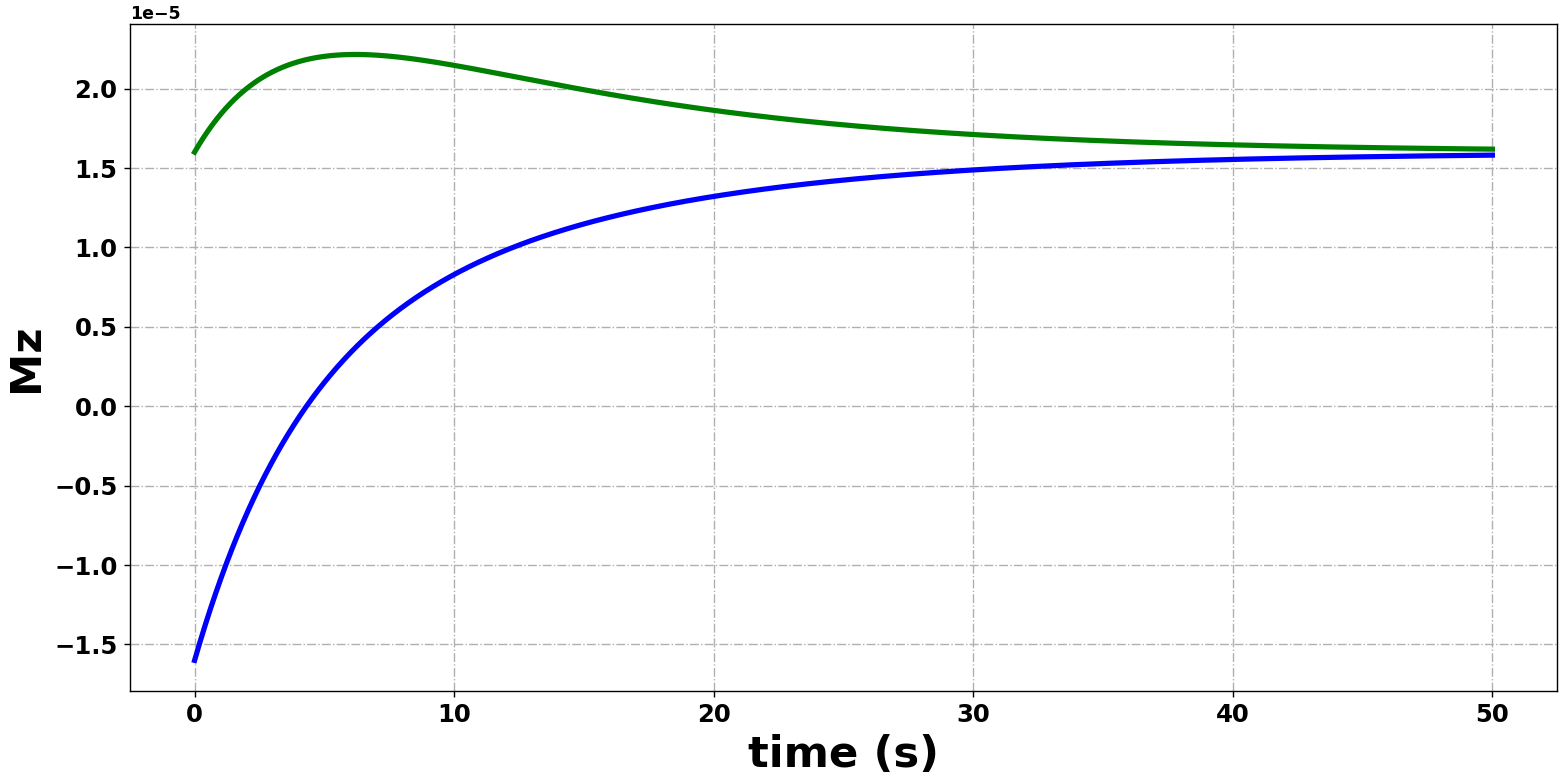

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


In [23]:
System.PlottingMulti(4,[t,t],[MZ_1,MZ_2],"time (s)","Mz",["green","blue"])

## Remarks
If you see something is wrong, please write to me.

## Any suggestion? write to me
vineethfrancis.physics@gmail.com